### Importing all the necessary library:


In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import missingno as msno
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

### Read in the dataset

In [229]:
bike_data=pd.read_csv('daily-bike-share.csv')

###  View first few rows

In [230]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [231]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day

In [232]:
bike_data.shape

(731, 15)

In [233]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


### lets explore the data types of every column

In [234]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
rentals         int64
day             int64
dtype: object

### Categorical Feature Conversion

In [235]:
categoricalFeatureNames = ["season","mnth","holiday","weekday","workingday","weathersit"]
for var in categoricalFeatureNames:
    bike_data[var] = bike_data[var].astype("category")
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    int64   
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  rentals     731 non-null    int64   
 14  day         731 non-null    int64   
dtypes: category(6), float64(4), int64(4), object(1)
memory usage: 57.1+ KB


### Check null values

In [236]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
day           0
dtype: int64

In [237]:
bike_data.describe()

,instant,yr,temp,atemp,hum,windspeed,rentals,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,0.495385,0.474354,0.627894,0.190486,848.176471,15.738714
std,211.165812,0.500342,0.183051,0.162961,0.142429,0.077498,686.622488,8.809949
min,1.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,1.000000
25%,183.500000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,8.000000
50%,366.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,16.000000
75%,548.500000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,23.000000
max,731.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,31.000000


In [238]:
wind=bike_data['windspeed'].array
temp=bike_data['temp'].array

### Histogram for temperature with mean and median

Temprature mean value: 0.49538478850889184
Temprature median value: 0.498333


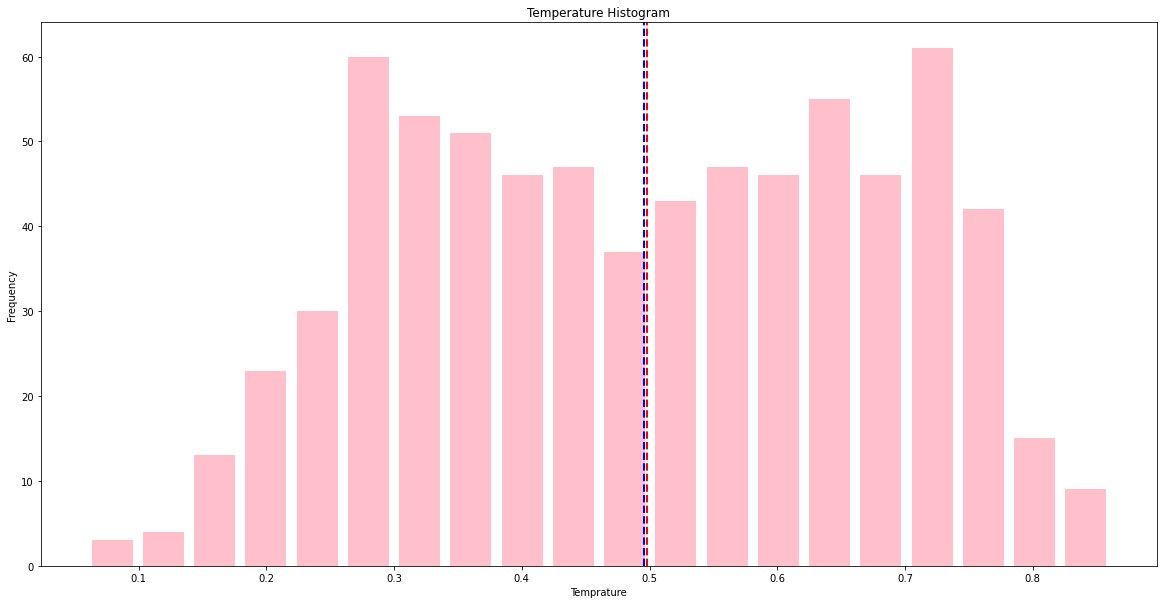

In [239]:
plt.figure(figsize=(20,10))
plt.xlabel("Temprature")
plt.ylabel("Frequency")
plt.title("Temperature Histogram")
plt.hist(temp, bins=20, rwidth=0.8, color='pink')
plt.axvline(temp.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(temp.median(), color='r', linestyle='dashed', linewidth=2)
temp.mean()
print(f'Temprature mean value: {temp.mean()}')
print(f'Temprature median value: {temp.median()}')


### Histogram for windspeed with mean and median

WindSpeed mean value: 0.1904862116279068
WindSpeed median value: 0.180975


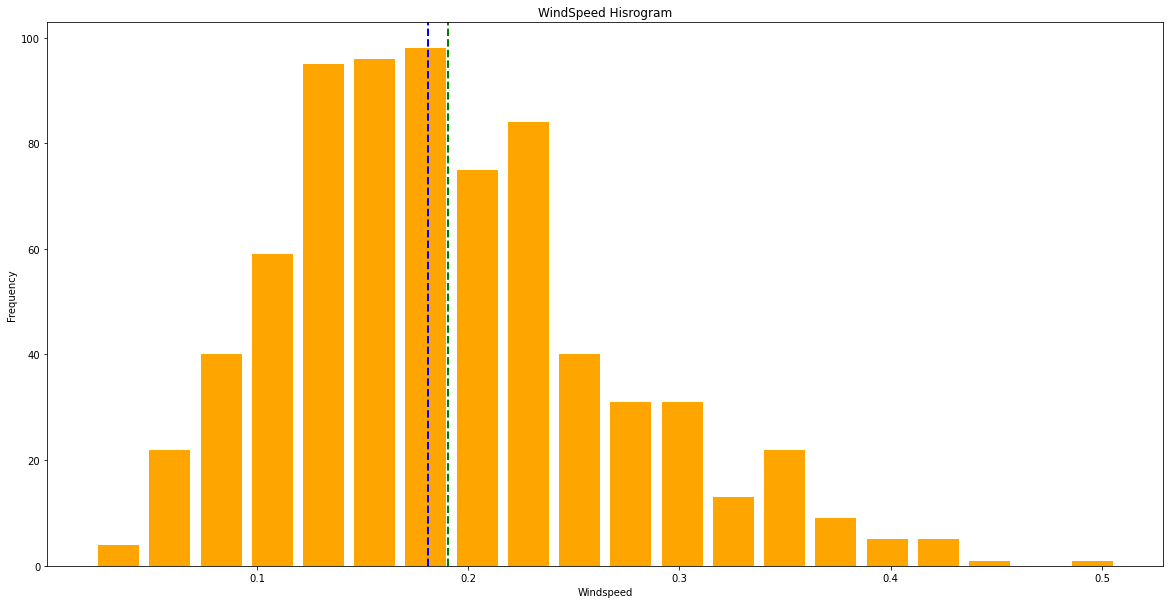

In [240]:
plt.figure(figsize=(20,10))
plt.xlabel("Windspeed")
plt.ylabel("Frequency")
plt.title("WindSpeed Hisrogram")
plt.hist(wind, bins=20, rwidth=0.8, color='orange')
plt.axvline(wind.mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(wind.median(), color='b', linestyle='dashed', linewidth=2)
print(f'WindSpeed mean value: {wind.mean()}')
print(f'WindSpeed median value: {wind.median()}')

### Skewness Distribution
From skewness distribution daigram the distribution on right side which shows outliers in the rentals column.

<AxesSubplot:>

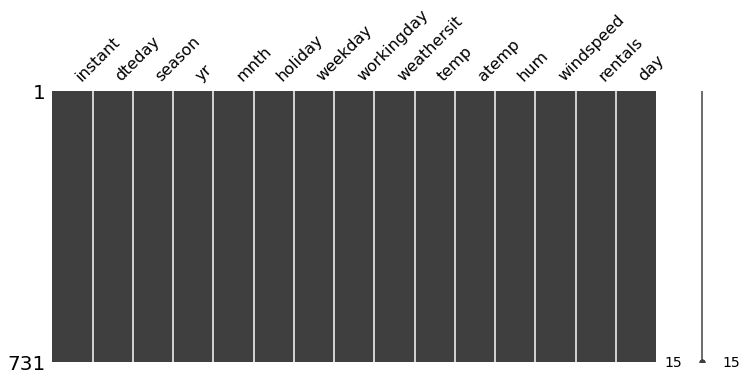

In [241]:
msno.matrix(bike_data,figsize=(12,5))

### Box plot for Outlier identification
There are some data points beyond Outer Quartile Limit

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

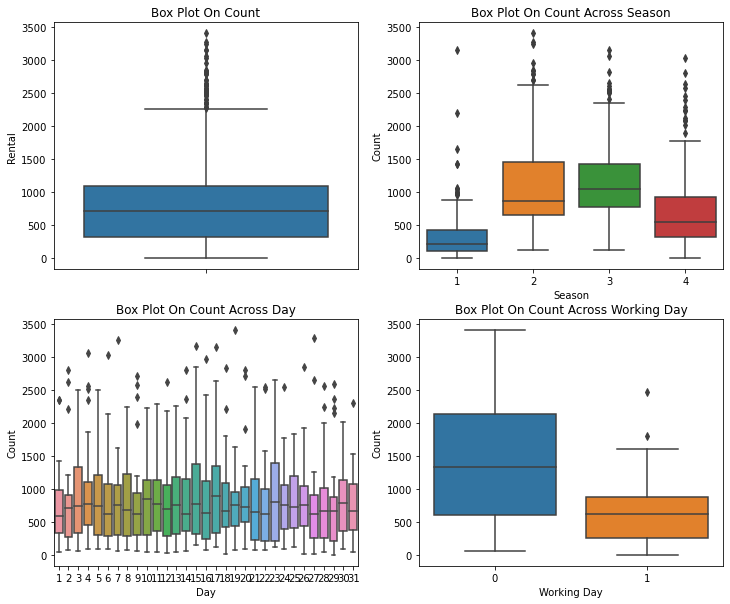

In [242]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=bike_data,y="rentals",orient="v",ax=axes[0][0])
sn.boxplot(data=bike_data,y="rentals",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=bike_data,y="rentals",x="day",orient="v",ax=axes[1][0])
sn.boxplot(data=bike_data,y="rentals",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Rental',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Day', ylabel='Count',title="Box Plot On Count Across Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

### Remove outliers in rental column

In [243]:
bike_data= bike_data[np.abs(bike_data["rentals"]-bike_data["rentals"].mean())<=(3*bike_data["rentals"].std())] 
bike_data.shape

(723, 15)

### Correlation Analysis

<AxesSubplot:>

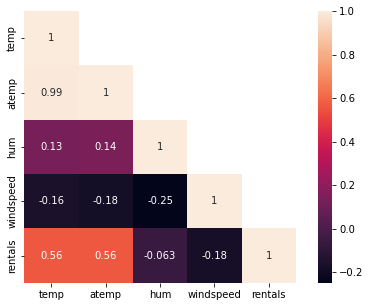

In [244]:
import seaborn as sns
cor_mat= bike_data[["temp","atemp","hum","windspeed","rentals"]].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(8,5)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)


### From correlation anlysis, it is found that

- temp and atemp are stongly co-related hence "atemp" feature is not taken

In [245]:
X =bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp',
'windspeed']]
y = bike_data['rentals']
X.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,windspeed
0,1,1,0,6,0,2,0.344167,0.160446
1,1,1,0,0,0,2,0.363478,0.248539
2,1,1,0,1,1,1,0.196364,0.248309
3,1,1,0,2,1,1,0.200000,0.160296
4,1,1,0,3,1,1,0.226957,0.186900


### Decoding categorical features

In [246]:
X =pd.get_dummies(X,columns=categoricalFeatureNames)
print('Shape of transfomed dataframe::',X.shape)
X.head()

Shape of transfomed dataframe:: (723, 32)


,temp,windspeed,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.160446,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.248539,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.248309,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.160296,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.186900,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [273]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)




### Linear Regression Model

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

lr_regar=linear_model.LinearRegression(normalize=True)
lr_regar.fit(X_train, y_train)
y_pred_lr=lr_regar.predict(X_test)

In [280]:
print(f'R_squared value: {lr_regar.score(X_test, y_test)}')

R_squared value: 0.6910690437028775


### Linear Algorithm ( Ridge and Lasso )

In [281]:
from sklearn.linear_model import Ridge, Lasso

In [282]:
rd = Ridge()

rd.fit(X_train,y_train)

print(f'R_squared value:{rd.score(X_test, y_test)}')

R_squared value:0.6924634164514839


In [283]:
ls = Lasso()

ls.fit(X_train,y_train)

print(f'R_squared value:{ls.score(X_test, y_test)}')

R_squared value:0.6974403842135072


In [284]:
rd2 = Ridge(alpha = 2)

rd2.fit(X_train,y_train)

print(f'R_squared value:{rd2.score(X_test, y_test)}')

R_squared value:0.6911213957291115


In [285]:
ls2 = Lasso(alpha = 2)

ls2.fit(X_train,y_train)
print(f'R_squared value:{ls2.score(X_test, y_test)}')

R_squared value:0.700846550377124


### Random Forest

In [286]:
from sklearn.ensemble import RandomForestRegressor

In [291]:
model_forest = RandomForestRegressor().fit(X_train, y_train)
y_pred_forest=model_forest.predict(X_test)

In [288]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_forest, X, y, scoring='r2')

scores

array([0.36377473, 0.33779688, 0.33254577, 0.44130912, 0.70213242])

In [289]:
print(f'R_squared value:{model_forest.score(X_test, y_test)}')

R_squared value:0.7021884914842085


In [290]:
y_pred1 = model_forest.predict(X_test)
print(f'R_squared value:{r2_score(y_test,y_pred1)}')

R_squared value:0.7021884914842085


### Gradient Boosting Regressor

In [292]:
from sklearn.ensemble import GradientBoostingRegressor

In [294]:
model_Gradient= GradientBoostingRegressor().fit(X_train, y_train)
y_pred_Gradient=model_forest.predict(X_test)

In [295]:
model_Gradient.score(X_test, y_test)

0.7091881476767272

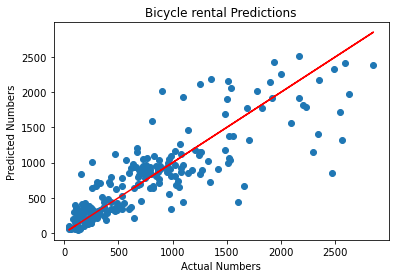

In [296]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Numbers')
plt.ylabel('Predicted Numbers')
plt.title('Bicycle rental Predictions')
plt.plot(y_test,y_test, color='red')
plt.show()

## R-sqaure value of Gradient Boosting Regressor

In [301]:
r2_scores = cross_val_score(model_Gradient, X_train, y_train, cv=5)
r2_scores

array([0.78180464, 0.82121794, 0.7539223 , 0.77599148, 0.64011071])

In [302]:
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7546094145194353


In [303]:
y_pred = model_forest.predict(X_test)
print(f'R_squared value from test data :{r2_score(y_test,y_pred)}')

R_squared value from test data :0.7102895194663532


### Evaluating model with Test data

In [309]:

df1 = pd.DataFrame(y_pred_lr,columns=['Linear_Pred'])
df2 = pd.DataFrame(y_pred_forest,columns=['Forest_Pred'])
df3 = pd.DataFrame(y_pred_Gradient, columns=['Gradient_Pred'])


Rental_predictions =pd.concat([df1,df2, df3], axis = 1)
Rental_predictions



,Linear_Pred,Forest_Pred,Gradient_Pred
0,1058.0,884.93,884.93
1,848.0,938.30,938.30
2,1106.5,1084.90,1084.90
3,-172.5,47.21,47.21
4,634.5,432.28,432.28
...,...,...,...
212,856.5,889.55,889.55
213,1194.5,921.91,921.91
214,972.5,893.03,893.03
215,717.0,667.69,667.69
